# Non-Linear Least Squares Fitting Example
## In this example, we read the data from a text file and fit it to a model using weighted non-linear least square fitting. We extract the best fit parameters along with their standrd error. Of particular interest is the half-life. We then plot the experimental data with the model using the best fit parameters.
The data was taken from nuclear fallout from an above ground nuclear test in October 1976. The experiment did not use sophisticated instruments. Rain water was filtered and the material that did not pass through the filter paper was studied. A geiger counter was used, the same type found in fallout shelters. Everyday for approximately one month, the activity was measured by counting the clicks within six 1 minute intervals. 

## Task 1: Read the data from the text file.

The most efficient way to process data from a file, is to read the entire file into an array variable and then parse the array. This is what we will do in this example.

First let's discuss how data is stored in a text file.

We will use a very general way to read data from a text file. In general, text files contain fields of ASCII text arranged in rows and columns. These fields are separated by special characters called delimiters. 
> What is ASCII? It is the most common way text characters, such as the letters of the text in this document, are encoded into binary. For historical reasons, this is called extended ASCII. Each byte in the file represents a single charcter. There are 256 possible characters. Some are not printable, such as the carraige return, line feed, and tab characters. The full table can be found here: 
<a href="https://www.ascii-code.com/">extended ASCII table</a>

The end of the rows are delimited by the sequence of the `carriage return` and `line feed` characters in windows/DOS and the `line feed` character in linux. Usually the end of row delimiter is handled automatically by most functions intended to read text files. For his reason, we will not worry about the row delimiters in our work.

The column delimiter is commonly a `comma`, `space`, or `tab` character. However it could be anything you wish. The restriction is that it must not be a character that could appear in the field of ASCII text. For example, the characters 0123456789.+-eE would be likely appear in the ASCII representation of numeric values and therefore would be poor choices as a delimiter. 

In this example, the data file is tab delimited. The first two rows are also a header, containing a destription of the data set and identify the rows. 

We will use the `numpy` function `loadtxt` to read the entire file into an array variable we arbitarily call data.
We direct `loadtxt` to skip the first two rows: `skiprows=2`
And set the delimiter to tab: `delimiter='\t'`

The file name for this data is:  `Bumm_China_nuclear_test_fallout_1976_10_10.txt`
In this cell, we assign the file name to the string variable `fname`. To check that fname was read correctly, we then print the name in the output.
In the print statement, `%s` is replaced with the value of `fname` when it is printed.

In [3]:
fname = 'Bumm_China_nuclear_test_fallout_1976_10_10 (1).txt'
print('reading data from: %s' % fname)

reading data from: Bumm_China_nuclear_test_fallout_1976_10_10 (1).txt


Let's load the data into the python variable 'data' and print the contents of 'data'. If the file is very long, you won't want to print every row. You could, for example, print only the first 10 rows of `data`. 

Remember that Python array index numbering begins at 0. For example the first 10 rows and all the columns is `data[0:10,:]`. 
>    `0:10` is shorthand for the range(0,10), which is (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).  
>    `:` is shorthand for all the elements.

In [5]:
import numpy as np
data = np.loadtxt(fname, skiprows=2, delimiter='\t')
#print(data)
#print(data[0:10,:])
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Arrays are a very powerful tools to work with data sets. Let's take a moment to look at some shorthand we can use to for the array indices. This is called *slicing.*

Concider an array `a`.  

Specify a consecutive range of elements:
> `a[start:stop]  # items start through stop-1`   
> `a[start:]      # items start through the rest of the array`  
> `a[:stop]       # items from the beginning through stop-1`  
> `a[:]           # a copy of the whole array` 

There is also the `step` value, which can be used with any of the above:
> `a[start:stop:step] # start through not past stop, by step` 

The key point to remember is that the `:stop` value represents the first value that is not in the selected slice. So, the difference between `stop` and `start` is the number of elements selected (if `step` is 1, the default).

The other feature is that `start` or `stop` may be a negative number, which means it counts from the end of the array instead of the beginning. So:
> `a[-1]    # last item in the array`  
> `a[-2:]   # last two items in the array`  
> `a[:-2]   # everything except the last two items`  

Similarly, `step` may be a negative number:
> `a[::-1]    # all items in the array, reversed`
> `a[1::-1]   # the first two items, reversed`
> `a[:-3:-1]  # the last two items, reversed`
> `a[-3::-1]  # everything except the last two items, reversed`  

Python is kind to the programmer if there are fewer items than you ask for. For example, if you ask for `a[:-2]` and a only contains one element, you get an empty list instead of an error. Sometimes you would prefer the error, so you have to be aware that this may happen.

As you learn more about the Python language, you will discover that these short cuts are an examples of the `range()` and `slice()` functions.

Next we verify the shape(dimensions) of the array `data` using numpy's `shape` function. This is handy because everything will go wrong if the data is not read correctly. 
NOTE: when you do read your data, you should have a basic idea the shape of the data you intend to read. Probably you entered your data in a spreadsheet program such as Excel, or can view it in another spreadsheet program.

In [6]:
[len_data, wid_data] = np.shape(data) # rows and width of data
print('data is %i rows: %i x columns' % (len_data, wid_data))

data is 28 rows: 7 x columns


If we were successful, the array `data` is a replica of the data in the text file.

The structure of the data is the first column (column 0) is the time in days elapse from the first measurement. At each time point the counts were measured 6 times and are contained in the nest 6 columns (columns 1-6). The data in each column correspond to one set of measurments. 

For the analysis we want to parse the data array into the time array and the counts array. 
The time data is the first column: `data[:,0]`
The counts are the remaining 6 columns: `data[:,1:7]`

In [8]:
t = data[:,0]  # read all rows of the 1st column (index numbering starts from 0, so the 1st column has index 0)
counts = data[:,1:7] # read all rows of the 2nd through 7th column (columns indices 1 to 6)

Now let's take a look at the two variables we have extracted.

In [9]:
print('contents of t:')
print(t)
print('contents of counts:')
print(counts)

contents of t:
[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 23. 25. 26. 27. 28. 29. 30.]
contents of counts:
[[50. 51. 55. 59. 59. 63.]
 [55. 57. 60. 61. 62. 64.]
 [54. 55. 56. 62. 62. 64.]
 [49. 52. 58. 59. 60. 66.]
 [48. 50. 51. 52. 56. 58.]
 [42. 43. 43. 50. 54. 56.]
 [40. 41. 42. 42. 46. 50.]
 [40. 40. 41. 43. 43. 52.]
 [36. 39. 43. 46. 48. 50.]
 [37. 38. 41. 44. 45. 46.]
 [37. 38. 39. 39. 42. 46.]
 [33. 34. 39. 39. 45. 46.]
 [34. 35. 38. 39. 40. 43.]
 [33. 37. 38. 39. 41. 42.]
 [15. 25. 29. 32. 37. 39.]
 [25. 27. 27. 31. 35. 43.]
 [30. 32. 33. 34. 39. 40.]
 [27. 33. 36. 38. 39. 42.]
 [27. 27. 28. 34. 39. 42.]
 [28. 29. 31. 32. 36. 39.]
 [28. 30. 31. 34. 37. 39.]
 [27. 30. 30. 31. 35. 36.]
 [29. 30. 31. 32. 37. 43.]
 [20. 24. 26. 30. 30. 30.]
 [21. 23. 23. 26. 27. 33.]
 [24. 24. 25. 28. 32. 33.]
 [17. 19. 30. 30. 33. 33.]
 [19. 21. 23. 24. 25. 27.]]


## Task 2: Make a preliminary semilog plot of all the data to examine the trend visually.
We are using a semilog plot becasue we expect the counts to follow an exponential decay.

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator,LogFormatter

Text(0, 0.5, 'activity (counts per minute)')

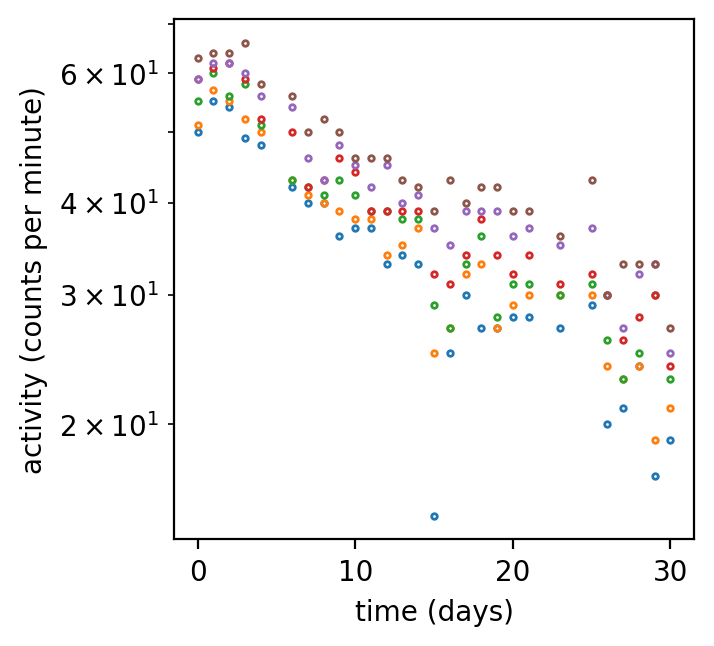

In [32]:
# set the dimensions of the figure canvas in inches
# and the display (and export) resolution. 

f_width = 3.25
f_height =  3.25
f_dpi = 200


fig = plt.figure(figsize=(f_width,f_height),dpi=f_dpi) # sets the size of the figure
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# set the font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'

ax.plot(t,counts[:,0:6],marker='o',markersize=2,markerfacecolor='none',linestyle='')

plt.yscale('log')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')

## Task 3: Fit the data to an exponential decay with a constant background and make a report-quality graph.
Our first approach is to average the data at each time point. That also allows us to estimate the uncertainty at each point using the standard deviation of the measurements and use that as the uncertainy in the weighted fit. 
1) First average the counts for each time point.

2) Calculate the uncertainty at each time point. 
> NOTE: For a group of measurments, the standard deviation approximates the uncertainty in the measurment. Because this is a counting experiment, the standard deviation is the `sqrt(total counts)`. But here we are working with the average of `n` measurements so the uncertainty in the mean is improved by `sqrt(n)`: `sqrt(mean(counts))/sqrt(n)`. If this had been some other type of measurement, the uncertainty would simply be the standard deviation from the `n` measurements at each time point. CAUTION: If the standard deviation is zero, the uncertainty for that point shouldbe replaced with the estimated uncertainty of the measurment, which is no smaller than half of the lest significant digit.

3) Use `curve_fit` from scipy to perform the weighted non-linear least square fit.

4) Extract the fit parameters and their standard error.

5) Generate the array to plot the best fit curve.

6) Plot the experimental data with error bars.

7) Plot the bext fit curve.

In the first two parts, we calculate the mean and uncertainty. There are a numpy functions `mean` and `std` (standard deviation). These are vectorized functions, meaning they can accept array variables and output array variables, greatly simpfying the code.

Let's first explore how this works. Simply writing: `np.mean(counts)`
returns a scalar, the mean of the entire data array. This is not useful for our task.

In [12]:
np.mean(counts)

38.779761904761905

The variable counts is a two-dinensional array, 28 rows: 7 x columns. We can tell `np.mean` in which direction we want to average using the `axis` parameter to tell the function which dimension to average in. 

`np.mean(counts, axis=0)` will average in the column direction, the result will be 1 x 7. Not useful.

`np.mean(counts, axis=1)` will average in the row direction, the result will be 28 x 1. What we want! This averages the 6 measurments at each time point. This gives us an array that is the average of the counts at each time point.

In [13]:
np.mean(counts, axis=1)

array([56.16666667, 59.83333333, 58.83333333, 57.33333333, 52.5       ,
       48.        , 43.5       , 43.16666667, 43.66666667, 41.83333333,
       40.16666667, 39.33333333, 38.16666667, 38.33333333, 29.5       ,
       31.33333333, 34.66666667, 35.83333333, 32.83333333, 32.5       ,
       33.16666667, 31.5       , 33.66666667, 26.66666667, 25.5       ,
       27.66666667, 27.        , 23.16666667])

Now let's implement what we have learned to generate an array of mean counts and an array of their uncertainty.

In [14]:
#average cpm
n = wid_data - 1 # number of data columns
mean_counts = np.mean(counts,axis=1) #mean of counts along the row axis (dimension)
std_counts = np.sqrt(mean_counts/n) #np.sqrt operated on the array, element by element

#if this is not a counting experiment
#std_counts = np.std(counts,axis=1) #standard deviation of counts along the row axis (dimension)

Let's print out what we have. I have organize the data into a 28 rows x 3 columns just for visulaization. The columns are the time (days), mean counts (counts per minute), uncertainty (counts per minute).

In [15]:
print(np.stack((t, mean_counts, std_counts), axis=1))

[[ 0.         56.16666667  3.05959329]
 [ 1.         59.83333333  3.15788255]
 [ 2.         58.83333333  3.13138237]
 [ 3.         57.33333333  3.09120617]
 [ 4.         52.5         2.95803989]
 [ 6.         48.          2.82842712]
 [ 7.         43.5         2.6925824 ]
 [ 8.         43.16666667  2.68224616]
 [ 9.         43.66666667  2.69773568]
 [10.         41.83333333  2.64049659]
 [11.         40.16666667  2.58736245]
 [12.         39.33333333  2.56038192]
 [13.         38.16666667  2.52212433]
 [14.         38.33333333  2.52762515]
 [15.         29.5         2.21735578]
 [16.         31.33333333  2.2852182 ]
 [17.         34.66666667  2.40370085]
 [18.         35.83333333  2.44381305]
 [19.         32.83333333  2.33927814]
 [20.         32.5         2.32737334]
 [21.         33.16666667  2.35112266]
 [23.         31.5         2.29128785]
 [25.         33.66666667  2.3687784 ]
 [26.         26.66666667  2.10818511]
 [27.         25.5         2.06155281]
 [28.         27.66666667

Now let's plot what we have before we go any further. We will plot the mean counts per minute with error bars.

In [1]:
f_width = 3.25
f_height =  3.25
f_dpi = 200

fig = plt.figure(figsize=(f_width,f_height),dpi=f_dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# set the font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'

plt.yscale('log')
ax.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

# plot the experimental data with the error bars
ax.errorbar(t,mean_counts,color='k',
            marker='o',markersize=4, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.0,
            linestyle='', yerr=std_counts, capsize=2, label='data', zorder=1)

ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')


NameError: name 'plt' is not defined

### Define the fitting function.

This requires careful thought. We know that radioactive decay follows a simple exponential decay: $a*exp(-bt)$. We'd like to determine the half life of the nuclear fall out, which is $ln(2)/b$. However to meaningfully fit the data, we need to include all the other phenomenas that contribute to the data. In this case we need to include the background count rate. Theefore we pick the model function for our data as: $a*exp(-bt) + c$

The fitting tools in python (and many other languages) require that the fitting function is defined as *function*. This is done using the `def` keyword. Here we name our function `fit_funct`. The arguments are `(x, a, b, c)` where the first argument is the independent variable and the rest will be the parameters that will be opimized to obtain the best fit. These arguments must correspond to the variables in the defined within the indented code block, after the `def` line and on or before the `return` line. The functions defined can be quite complex.

In this example writing `Y = fit_funct(t, w, r, g)` is equivalent to `Y =  w * np.exp(-r * t) + g`
Note that order of the argument determines which variable they correspond to. We are not resrticted to `(x, a, b, c)'.

In [17]:
def fit_func(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

Now let's plot the fit function. This is good practice. It allows you to choose intial values for the fit parameters. In this example, almost any reasonable intial value will converge to a good fit. However that is not true all models. A poor choice of initial conditions may lead the fit to converge at the wrong local minimum. Starting with initial conditions close to the reasonable valaue, allows the fit to converge the the global minimum. This is particularly true for model functions with periodic features. 

To plot the fit function, we want it to appear smooth. That requires at 100 points more or less. Less if its is a straigth line (2 points is enough) or more if it has a lot of wiggles. You can judge that by looking at the graph. A smooth function should look smooth!

We will use the numpy `linspace` function to generate 200 evenly spaced time points from 0 to 30. 

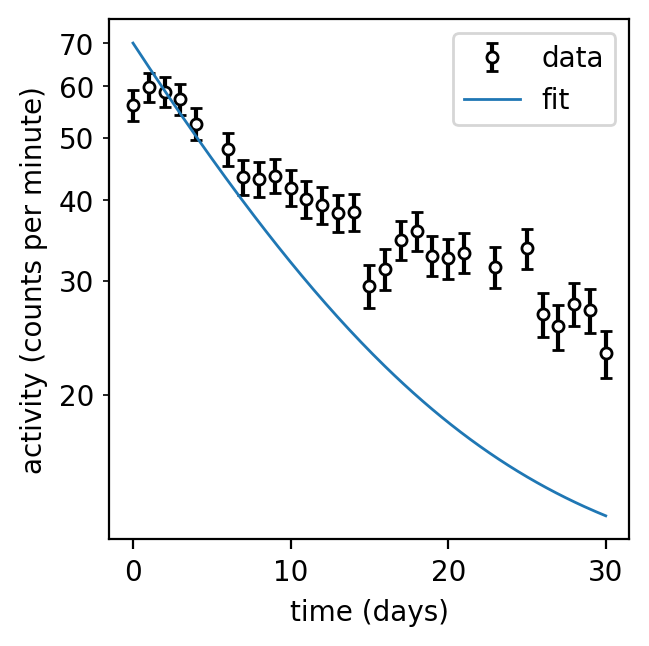

In [34]:
tt_start = 0
tt_end = 30
tt_steps = 200

tt = np.linspace(tt_start,tt_end,tt_steps) # array of time points for the fit function

iParm = np.array([60, .1, 10]) #initial parameters

yy = fit_func(tt,iParm[0],iParm[1],iParm[2]) # Use the parameters from the best fit to generate the best-fit line.


#now the plot
f_width = 3.25
f_height =  3.25
f_dpi = 200

fig = plt.figure(figsize=(f_width,f_height),dpi=f_dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# set the font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'

plt.yscale('log')
ax.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

# plot the experimental data with the error bars
ax.errorbar(t,mean_counts,color='k',
            marker='o',markersize=4, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.0,
            linestyle='', yerr=std_counts, capsize=2, label='data', zorder=1)

ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')

# plot the function
ax.plot(tt,yy,marker='', linestyle='-',linewidth=1,alpha=1, label='fit', zorder=2)

ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')

#set up the legend--you need a legend if you have more two or more things plotted on the same graph

#get handles and labels
handles, labels = ax.get_legend_handles_labels()
# add legend in default order
ax.legend(handles, labels)
#specify order of items in legend
order = [1,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

### The least squares fit
We use the scipy function `curve_fit` for weights non-linear least squares fitting. Let's unpack this function.

`popt, pcov = curve_fit(fit_func, t, mean_counts, iParm, sigma=std_counts)`

The arguments:
`fit_func` is the model function we defined. Curve_fit will attempt to fit this function to the data.
`t` is the array of independent data, the time value in this experiment.
`mean_counts` is the array of dependent data, the mean counts in this experiment.
*Note that the length and diemnsions of `t` and `mean_counts` must be the same.
`iParm` is the array of initial parameters. The array must have the same length as the number of adjustable parameters you define in the `fit_func`. The order of parameters is the same as the order in the `fit_func` definition.
`sigma=std_counts` `sigma=` is the keyword used to pass the uncertainty. In this case, `std_counts` is an array of the uncertainty in the mean counts and must have the same length as `t`, and `mean_counts`. 

The output:
`popt` are the values of the adjustable parameters the fit converged to. It is up to the user to decide if those are the best fit.
`pcov` is the covarance matrix. It is a square matrix. The sqrt() of the diagonal elements gives the standard error in parameters in `popt`.

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, t, mean_counts, iParm, sigma=std_counts)
print(popt)

[40.58440128  0.06358069 20.08469138]


Let's look at the results. For the standard error we us the numpy function `diag` to extract the diagonal elements and numpy 'sqrt' to do and element by element sqrt().

In [21]:
print('the fit converged to:')
print(popt)

perr = np.sqrt(np.diag(pcov))  # extract the standrd error from the covariance matrix
print('stardard error:')
print(perr)

the fit converged to:
[40.58440128  0.06358069 20.08469138]
stardard error:
[2.98486271 0.01322586 3.53738816]


We can output it is a differnt form.

In [22]:
print('a = %0.1e +/-%8.1e cpm; b = %4.3e +/-%4.3e 1/day; c = %4.1e +/-%4.1e cpm ' % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

a = 4.1e+01 +/- 3.0e+00 cpm; b = 6.358e-02 +/-1.323e-02 1/day; c = 2.0e+01 +/-3.5e+00 cpm 


We can calculate the half life.

In [23]:
half_life = np.log(2)/popt[1]
hl_error = half_life * perr[1]/popt[1]
print('half life = %4.1f +/- %4.1f days' % (half_life, hl_error))


half life = 10.9 +/-  2.3 days


Now let's plot the data with the best fit line. The final product is this graph and the parameters of interest with the standard error.

results with counts for each time point averaged
a = 40.6 +/- 3.0 cpm; b = 0.064 +/-0.013 1/day; c = 20.1 +/- 3.5 cpm 
half life = 10.9 +/-  2.3 days



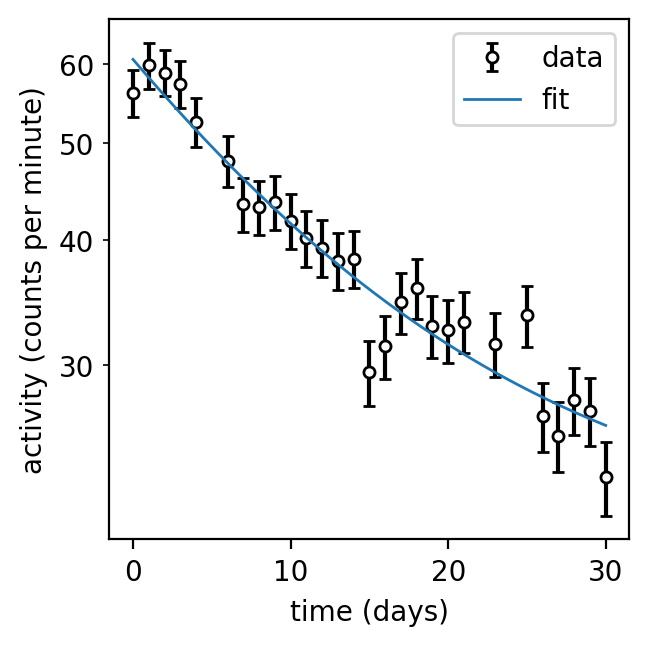

In [36]:
f_width = 3.25
f_height =  3.25
f_dpi = 200

# set up the paramaters for the fit line. 
#You want the point density to be high enough so it looks smooth in the graph.
t_start = 0
t_end = 30
t_steps = 200

tt = np.linspace(t_start,t_end,t_steps) # array of time points for the best-fit line
yy = fit_func(tt,popt[0],popt[1],popt[2]) # Use the parameters from the best fit to generate the best-fit line.
perr = np.sqrt(np.diag(pcov))  # extract the standard error from the covariance matrix

# display the results on the console for convenience, In this example
# the variables are displayed in fixed point format, the number of decimal places 
# was chosen specifically for this example. You will need to change that for your data.
print('results with counts for each time point averaged')
print('a = %4.1f +/-%4.1f cpm; b = %4.3f +/-%4.3f 1/day; c = %4.1f +/-%4.1f cpm ' % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

# calculate and display the half life
half_life = np.log(2)/popt[1]
hl_error = half_life * perr[1]/popt[1]
print('half life = %4.1f +/- %4.1f days' % (half_life, hl_error))
print()

# plot the figure
fig = plt.figure(figsize=(f_width,f_height),dpi=f_dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# set the font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'


plt.yscale('log')
ax.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

# plot the experimental data with the error bars
ax.errorbar(t,mean_counts,color='k',
            marker='o',markersize=4, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.0,
            linestyle='', yerr=std_counts, capsize=2, label='data', zorder=1)

# plot the best fit line
ax.plot(tt,yy,marker='', linestyle='-',linewidth=1,alpha=1, label='fit', zorder=2)

ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')

#set up the legend--you need a legend if you have more two or more things plotted on the same graph

#get handles and labels
handles, labels = ax.get_legend_handles_labels()
# add legend in default order
ax.legend(handles, labels)
#specify order of items in legend
order = [1,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig('plot.png', bbox_inches='tight', dpi=300)